In [1]:
import pandas as pd
import pyodbc
conn = pyodbc.connect(
    'DRIVER={SQL Server};'
    'SERVER=MAYAR;'
    'DATABASE=DW_hotels;'
    'Trusted_Connection=yes;'  
)

# SQL query
query = ''' 
SELECT 
    Customer_id,
    [Ease of Navigation],
    [Website Speed],
    [Mobile Friendliness],
    [Customer Support],
    [Booking Ease],
    [Payment Security],
    [Room Availability],
    [Cancellation Policy],
    Satisfaction
FROM Fact_feedbacks

'''
df = pd.read_sql(query, conn)

C:\Users\mayar\AppData\Local\Temp\ipykernel_8232\2047268887.py:26: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


In [2]:
df['Satisfaction'] = df['Satisfaction'].map({
    'satisfied': 1,
    'neutral or dissatisfied': 0,
    'Neutral or Dissatisfied': 0,
    'Satisfied': 1,
    'Dissatisfied': 0
})


In [3]:
df.head()

,Customer_id,Ease of Navigation,Website Speed,Mobile Friendliness,Customer Support,Booking Ease,Payment Security,Room Availability,Cancellation Policy,Satisfaction
0,1,3,3,2,4,1,1,5,5,1
1,2,2,5,1,4,2,4,4,1,1
2,3,5,2,2,2,4,4,3,4,1
3,4,2,2,3,1,1,1,4,3,1
4,5,5,4,3,1,2,1,5,5,0


In [4]:
satisfaction_counts = df['Satisfaction'].value_counts()
satisfaction_counts

Satisfaction
1    17465
0     9532
Name: count, dtype: int64

In [5]:
X = df.drop(columns=['Customer_id', 'Satisfaction'])
y = df['Satisfaction']


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
rf_preds = model.predict(X_test)

print(classification_report(y_test, rf_preds))
print(confusion_matrix(y_test, rf_preds))


              precision    recall  f1-score   support

           0       0.34      0.15      0.21      1933
           1       0.64      0.84      0.73      3467

    accuracy                           0.59      5400
   macro avg       0.49      0.49      0.47      5400
weighted avg       0.53      0.59      0.54      5400

[[ 289 1644]
 [ 557 2910]]


In [7]:
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix



xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42
)

xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_test)

print(classification_report(y_test, xgb_preds))
print(confusion_matrix(y_test, xgb_preds))


              precision    recall  f1-score   support

           0       0.34      0.13      0.19      1933
           1       0.64      0.86      0.73      3467

    accuracy                           0.60      5400
   macro avg       0.49      0.50      0.46      5400
weighted avg       0.53      0.60      0.54      5400

[[ 255 1678]
 [ 490 2977]]


c:\Users\mayar\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:28:29] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [8]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Train Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

# Train XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_test)

# Define a function to calculate metrics
def get_metrics(y_true, y_pred):
    return {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1 Score": f1_score(y_true, y_pred)
    }

# Get metrics for both models
rf_metrics = get_metrics(y_test, rf_preds)
xgb_metrics = get_metrics(y_test, xgb_preds)

# Create a DataFrame for comparison
import pandas as pd
comparison_df = pd.DataFrame([rf_metrics, xgb_metrics], index=['Random Forest', 'XGBoost'])
comparison_df = comparison_df.round(4)

print(comparison_df)


c:\Users\mayar\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:28:31] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


               Accuracy  Precision  Recall  F1 Score
Random Forest    0.5924     0.6390  0.8393    0.7256
XGBoost          0.5985     0.6395  0.8587    0.7331


In [9]:
df_cleaned = df.drop_duplicates(subset=[col for col in df.columns if col != 'Customer_id'], keep='first')


In [10]:
satisfaction_counts = df_cleaned['Satisfaction'].value_counts()
satisfaction_counts

Satisfaction
1    17093
0     9433
Name: count, dtype: int64

In [11]:
X_cleaned = df_cleaned.drop(columns=['Customer_id', 'Satisfaction'])
y_cleaned = df_cleaned['Satisfaction']


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_cleaned, y_cleaned, test_size=0.2, random_state=42)


In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

print(classification_report(y_test, rf_preds))
print(confusion_matrix(y_test, rf_preds))


              precision    recall  f1-score   support

           0       0.30      0.13      0.18      1867
           1       0.64      0.83      0.72      3439

    accuracy                           0.58      5306
   macro avg       0.47      0.48      0.45      5306
weighted avg       0.52      0.58      0.53      5306

[[ 243 1624]
 [ 580 2859]]


In [14]:
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix

xgb_model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False, random_state=42)
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_test)

print(classification_report(y_test, xgb_preds))
print(confusion_matrix(y_test, xgb_preds))


c:\Users\mayar\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:28:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.35      0.14      0.20      1867
           1       0.65      0.85      0.74      3439

    accuracy                           0.60      5306
   macro avg       0.50      0.50      0.47      5306
weighted avg       0.54      0.60      0.55      5306

[[ 269 1598]
 [ 504 2935]]


In [17]:
satisfaction_counts = df_cleaned['Satisfaction'].value_counts()
satisfaction_counts

Satisfaction
1    17093
0     9433
Name: count, dtype: int64

In [16]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Assuming you have X_cleaned and y_cleaned from earlier
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cleaned)

# Convert to PyTorch tensors
X_tensor = torch.tensor(X_scaled, dtype=torch.float32)
y_tensor = torch.tensor(y_cleaned.values, dtype=torch.long)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)

# Define a simple neural network model
class NeuralNetwork(nn.Module):
    def __init__(self, input_size):
        super(NeuralNetwork, self).__init__()
        self.layer1 = nn.Linear(input_size, 64)  # Input layer
        self.layer2 = nn.Linear(64, 32)          # Hidden layer
        self.output = nn.Linear(32, 2)           # Output layer (2 for binary classification)

    def forward(self, x):
        x = torch.relu(self.layer1(x))  # Apply ReLU activation
        x = torch.relu(self.layer2(x))  # Apply ReLU activation
        x = self.output(x)              # Output layer
        return x

# Initialize the model, loss function, and optimizer
model = NeuralNetwork(X_train.shape[1])  # Input size should match the number of features
criterion = nn.CrossEntropyLoss()  # Suitable for classification
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
epochs = 50
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()  # Clear the gradients

    # Forward pass
    outputs = model(X_train)
    loss = criterion(outputs, y_train)

    # Backward pass
    loss.backward()
    optimizer.step()

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

# Evaluate the model
model.eval()
with torch.no_grad():
    outputs = model(X_test)
    _, predicted = torch.max(outputs, 1)  # Get the class with the highest score
    print(classification_report(y_test, predicted))
    print(confusion_matrix(y_test, predicted))


Epoch [10/50], Loss: 0.6579
Epoch [20/50], Loss: 0.6557
Epoch [30/50], Loss: 0.6527
Epoch [40/50], Loss: 0.6526
Epoch [50/50], Loss: 0.6520
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1867
           1       0.65      1.00      0.79      3439

    accuracy                           0.65      5306
   macro avg       0.32      0.50      0.39      5306
weighted avg       0.42      0.65      0.51      5306

[[   0 1867]
 [   0 3439]]


c:\Users\mayar\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\mayar\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\mayar\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [24]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import classification_report, confusion_matrix

# Neural Network architecture (as defined earlier)
class NeuralNetwork(nn.Module):
    def __init__(self, input_size):
        super(NeuralNetwork, self).__init__()
        self.layer1 = nn.Linear(input_size, 64)  # Input layer
        self.layer2 = nn.Linear(64, 32)          # Hidden layer
        self.output = nn.Linear(32, 2)           # Output layer (2 for binary classification)

    def forward(self, x):
        x = torch.relu(self.layer1(x))  # Apply ReLU activation
        x = torch.relu(self.layer2(x))  # Apply ReLU activation
        x = self.output(x)              # Output layer
        return x

# Convert the SMOTE-balanced data into PyTorch tensors
X_train_smote_tensor = torch.tensor(X_train_smote, dtype=torch.float32)
y_train_smote_tensor = torch.tensor(y_train_smote.values, dtype=torch.long)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

# Initialize the model, loss function, and optimizer
model = NeuralNetwork(X_train_smote_tensor.shape[1])  # Input size should match the number of features
criterion = nn.CrossEntropyLoss()  # Suitable for classification
optimizer = optim.Adam(model.parameters(), lr=0.0000001)

# Train the model
epochs = 50
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()  # Clear the gradients

    # Forward pass
    outputs = model(X_train_smote_tensor)
    loss = criterion(outputs, y_train_smote_tensor)

    # Backward pass
    loss.backward()
    optimizer.step()

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

# Evaluate the model
model.eval()
with torch.no_grad():
    outputs = model(X_test_tensor)
    _, predicted = torch.max(outputs, 1)  # Get the class with the highest score
    print(classification_report(y_test_tensor, predicted))
    print(confusion_matrix(y_test_tensor, predicted))


Epoch [10/50], Loss: 0.7005
Epoch [20/50], Loss: 0.7005
Epoch [30/50], Loss: 0.7005
Epoch [40/50], Loss: 0.7005
Epoch [50/50], Loss: 0.7005
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1933
           1       0.64      1.00      0.78      3467

    accuracy                           0.64      5400
   macro avg       0.32      0.50      0.39      5400
weighted avg       0.41      0.64      0.50      5400

[[   0 1933]
 [   0 3467]]


c:\Users\mayar\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\mayar\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\mayar\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [30]:
from sklearn.metrics import classification_report, accuracy_score

def evaluate_model(model, X_test_tensor, y_test_tensor):
    """
    Evaluates the model using accuracy, precision, recall, and F1-score.
    """
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():
        # Get model predictions
        outputs = model(X_test_tensor)
        _, predicted = torch.max(outputs, 1)  # Get the class with the highest score

        # Calculate accuracy
        accuracy = accuracy_score(y_test_tensor.numpy(), predicted.numpy())
        
        # Print classification report (includes precision, recall, f1-score)
        print(classification_report(y_test_tensor.numpy(), predicted.numpy()))
        
        return accuracy  # You can also return other metrics like precision, recall, etc.


In [32]:
import torch.optim as optim
import torch
from sklearn.metrics import classification_report, accuracy_score

# Define the Neural Network Model
class NeuralNetwork(nn.Module):
    def __init__(self, input_size):
        super(NeuralNetwork, self).__init__()
        self.layer1 = nn.Linear(input_size, 64)  # Input layer
        self.layer2 = nn.Linear(64, 32)          # Hidden layer
        self.output = nn.Linear(32, 2)           # Output layer (2 for binary classification)

    def forward(self, x):
        x = torch.relu(self.layer1(x))  # Apply ReLU activation
        x = torch.relu(self.layer2(x))  # Apply ReLU activation
        x = self.output(x)              # Output layer
        return x

# Define the evaluation function (accuracy, precision, recall, F1-score)
def evaluate_model(model, X_test_tensor, y_test_tensor):
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():
        # Get model predictions
        outputs = model(X_test_tensor)
        _, predicted = torch.max(outputs, 1)  # Get the class with the highest score
        
        # Calculate accuracy
        accuracy = accuracy_score(y_test_tensor.numpy(), predicted.numpy())
        return accuracy  # Return accuracy (you can also return other metrics if needed)

# Hyperparameters to try in Grid Search
learning_rates = [0.001, 0.0005, 0.0001]
betas = [(0.9, 0.999), (0.8, 0.99), (0.75, 0.95)]

best_accuracy = 0
best_params = {}

# Perform Grid Search
for lr in learning_rates:
    for beta in betas:
        # Initialize the model and optimizer with current hyperparameters
        model = NeuralNetwork(X_train_smote_tensor.shape[1])  # Assuming input features match
        optimizer = optim.Adam(model.parameters(), lr=lr, betas=beta)
        
        # Train the model for a few epochs
        for epoch in range(10):  # You can adjust the number of epochs
            model.train()
            optimizer.zero_grad()
            outputs = model(X_train_smote_tensor)
            loss = criterion(outputs, y_train_smote_tensor)
            loss.backward()
            optimizer.step()
        
        # Evaluate the model after training
        accuracy = evaluate_model(model, X_test_tensor, y_test_tensor)
        
        # Update the best parameters if the current accuracy is higher
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_params = {'lr': lr, 'betas': beta}

# Print the best hyperparameters (without showing individual accuracies)
print("Best Hyperparameters:", best_params)


Best Hyperparameters: {'lr': 0.0005, 'betas': (0.75, 0.95)}


Epoch [10/50], Loss: 0.6932
Epoch [20/50], Loss: 0.6925
Epoch [30/50], Loss: 0.6920
Epoch [40/50], Loss: 0.6915
Epoch [50/50], Loss: 0.6910

Classification Report:
              precision    recall  f1-score   support

           0       0.35      0.47      0.40      1933
           1       0.64      0.52      0.58      3467

    accuracy                           0.50      5400
   macro avg       0.50      0.50      0.49      5400
weighted avg       0.54      0.50      0.51      5400


Confusion Matrix:
[[ 907 1026]
 [1654 1813]]


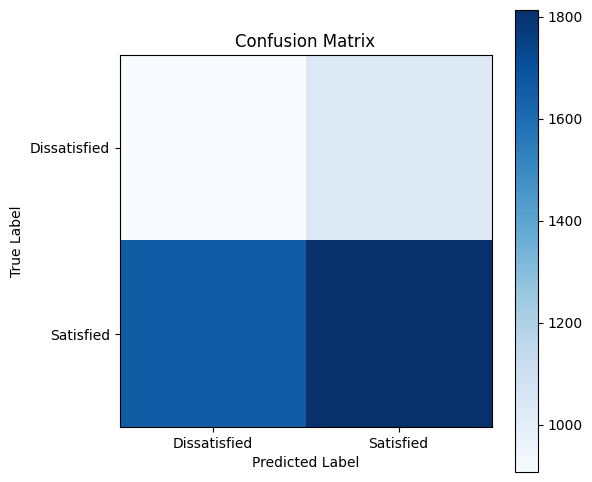

In [33]:
import torch
import torch.optim as optim
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Best hyperparameters from grid search
lr_best = 0.0005
betas_best = (0.75, 0.95)

# Initialize the model with the best hyperparameters
model = NeuralNetwork(X_train_smote_tensor.shape[1])  # Assuming input features match
optimizer = optim.Adam(model.parameters(), lr=lr_best, betas=betas_best)

# Train the model with the best hyperparameters
epochs = 50  # You can adjust the number of epochs as needed
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()  # Clear previous gradients

    # Forward pass
    outputs = model(X_train_smote_tensor)
    loss = criterion(outputs, y_train_smote_tensor)

    # Backward pass
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

# Evaluate the model on the test set
model.eval()
with torch.no_grad():
    # Get model predictions
    outputs = model(X_test_tensor)
    _, predicted = torch.max(outputs, 1)  # Get the class with the highest score

    # Print classification report
    print("\nClassification Report:")
    print(classification_report(y_test_tensor.numpy(), predicted.numpy()))

    # Confusion matrix
    print("\nConfusion Matrix:")
    cm = confusion_matrix(y_test_tensor.numpy(), predicted.numpy())
    print(cm)

    # Plot confusion matrix
    plt.figure(figsize=(6,6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.colorbar()
    tick_marks = [0, 1]
    plt.xticks(tick_marks, ['Dissatisfied', 'Satisfied'])
    plt.yticks(tick_marks, ['Dissatisfied', 'Satisfied'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()


In [34]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
cv_scores = cross_val_score(rf_model, X_train_smote, y_train_smote, cv=5, scoring='accuracy')
print(f"Cross-validation Accuracy: {cv_scores.mean():.4f}")


Cross-validation Accuracy: 0.6881


In [35]:
# Get probabilities instead of hard class labels
y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]
threshold = 0.3  # Lower threshold to favor predicting the minority class
y_pred = (y_pred_proba > threshold).astype(int)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.89      0.03      0.06      1933
           1       0.65      1.00      0.79      3467

    accuracy                           0.65      5400
   macro avg       0.77      0.51      0.42      5400
weighted avg       0.74      0.65      0.53      5400

[[  58 1875]
 [   7 3460]]
